## User Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

## User Details

In [2]:
user_details = pd.read_csv('user_purchase_data.csv')

In [3]:
user_details.head()

,user_uid,date_joined,date_of_first_purhcase
0,6,2021-06-04,2021-06-04
1,608,2021-06-04,NaN
2,635,2021-06-04,NaN
3,745,2021-06-04,NaN
4,1506,2021-06-04,NaN


In [4]:
user_details.shape

(1000, 3)

asuming the user_uid that have date_of_first_purhcase are paid users, created a boolean varible purchased

In [5]:
user_details[['purchased']]=user_details[['date_of_first_purhcase']].notnull()

In [6]:
user_details.purchased.value_counts()

True     576
False    424
Name: purchased, dtype: int64

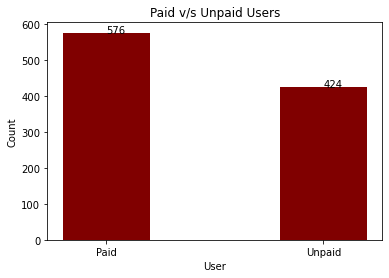

In [7]:
user = ['Paid','Unpaid']
plt.bar(user,user_details.purchased.value_counts(),color = 'maroon',width = 0.4)
plt.title("Paid v/s Unpaid Users")
plt.xlabel("User")
plt.ylabel("Count")

for index, value in enumerate(user_details.purchased.value_counts()):
    plt.text(index, value, str(value))

plt.title
plt.show()

In [8]:
user_details['date_joined'] = pd.to_datetime(user_details.date_joined)
user_details['date_of_first_purhcase']=pd.to_datetime(user_details.date_of_first_purhcase)

In [9]:
user_details['date_diff'] = abs(user_details.date_of_first_purhcase -user_details.date_joined)

In [10]:
paid_user = user_details[user_details.purchased==True]
unpaid_user = user_details[user_details.purchased==False]

In [11]:
paid_user.shape

(576, 5)

In [12]:
paid_user.describe()

,user_uid,date_diff
count,576.000000,576
mean,188357.305556,3 days 15:22:30
std,119879.023050,6 days 21:05:37.308180844
min,6.000000,0 days 00:00:00
25%,87120.500000,0 days 00:00:00
50%,175819.500000,1 days 00:00:00
75%,294778.000000,3 days 00:00:00
max,404277.000000,48 days 00:00:00


average of absolute diffrence between date_joined and date_of_first_purhcase for a paid user is 3 days and 15h 23min

In [18]:
ddiff = re.findall('\d+',str(paid_user.date_diff))


In [19]:
ddiff

['0',
 '0',
 '6',
 '0',
 '8',
 '12',
 '9',
 '0',
 '10',
 '32',
 '985',
 '0',
 '992',
 '0',
 '995',
 '1',
 '997',
 '1',
 '998',
 '0',
 '576',
 '64']

In [36]:
user_uid=list(paid_user.user_uid)
len(user_uid)

In [38]:
pd.DataFrame(user_uid,ddiff,columns=['user_uid','ddiff'])

ValueError: Shape of passed values is (576, 1), indices imply (22, 2)

In [26]:
paid_user.head()

,user_uid,date_joined,date_of_first_purhcase,purchased,date_diff,ddiff
0,6,2021-06-04,2021-06-04,True,0 days,64
6,1642,2021-06-04,2021-06-04,True,0 days,64
8,1831,2021-06-04,2021-06-16,True,12 days,64
9,2610,2021-06-05,2021-06-05,True,0 days,64
10,3418,2021-06-05,2021-07-07,True,32 days,64
